<a href="https://colab.research.google.com/github/Rustam64/RandomForest/blob/main/RF_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

#File names based on the area
files = {
    "central": "central.xlsx",
    "east": "east.xlsx",
    "west": "west.xlsx",
    "north": "north.xlsx",
    "south": "south.xlsx"
}

dfs = []
# Load each file and add the area
for area, filename in files.items():
    df_area = pd.read_excel(filename)
    df_area["area"] = area
    dfs.append(df_area)


# Combine into one dataframe
df = pd.concat(dfs, ignore_index=True)

# Replace 'tmin' with NaN before dropping rows
df['tmin'] = df['tmin'].astype(str).str.replace('`', '', regex=False)
df['tmin'] = pd.to_numeric(df['tmin'], errors='coerce')
df = df.dropna()
df = df.drop(['observation '], axis=1)

print(df.head())
print(df["area"].value_counts())

        Time  logPM2.5  Rain       tmin   Traffic   Temp      RH  tmax  \
0 2018-04-20  1.343822   0.0   7.600000  108000.0   2.18  16.125  26.4   
1 2018-04-21  1.512578   0.0  11.200000  135000.0   3.71  18.375  25.0   
2 2018-04-22  1.742709   0.0   7.800000  156000.0   3.03  18.750  24.6   
7 2018-04-27  1.524318   0.0  13.400001   87000.0  16.46  18.000  27.4   
8 2018-04-28  1.535750   0.0  12.200000  132000.0  17.14  19.375  30.0   

       Wd     Ws        wc        ws        Lo        La     area  
0  202.50  2.250  0.297758  2.230211  51.66779  32.64652  central  
1  171.25  1.625 -0.053941  1.624104  51.66779  32.64652  central  
2  148.75  1.375 -0.629636 -1.222368  51.66779  32.64652  central  
7  160.00  3.000 -2.926888  0.658276  51.66779  32.64652  central  
8  113.75  2.625  2.085480  1.594177  51.66779  32.64652  central  
area
west       2402
central    2311
south      1782
east       1727
north      1164
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode area into integers
df["area_id"] = LabelEncoder().fit_transform(df["area"])
df = df.drop(['area'], axis=1)

In [ ]:
# Data is already sorted by time. This is just to confirm before training the model.
df = df.sort_values(by="Time")

n = len(df)
# Iloc is used to set start and endpoints in the dataframe
# Data split: 70% train, 15% val, 15% test
train_df = df.iloc[:int(0.7*n)]
val_df   = df.iloc[int(0.7*n):int(0.85*n)]
test_df  = df.iloc[int(0.85*n):]

In [ ]:
features = ["logPM2.5","Rain","tmin","Traffic","Temp","RH","tmax","Wd","Ws","wc","ws","Lo","La"]
target = "logPM2.5"

X_train, y_train = train_df[features], train_df[target]
X_val, y_val = val_df[features], val_df[target]
X_test, y_test = test_df[features], test_df[target]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize model
rf = RandomForestRegressor(
    n_estimators=200,  # number of trees
    max_depth=10,      # prevent overfitting
    random_state=42,
    n_jobs=-1
)

# Fit on training set
rf.fit(X_train, y_train)

# Validate
val_preds = rf.predict(X_val)
val_rmse = mean_squared_error(y_val, val_preds)
print("Validation RMSE:", val_rmse)

Validation RMSE: 3.159262629147813e-05


In [ ]:
test_preds = rf.predict(X_test)
test_mae = mean_squared_error(y_test, test_preds)
print("Test MAE:", test_mae)
test_rmse = mean_squared_error(y_test, test_preds)
print("Test RMSE:", test_rmse)
test_r2 = rf.score(X_test, y_test)
print("Test R2:", test_r2)

Test MAE: 3.722216708854064e-08
Test RMSE: 3.722216708854064e-08
Test R2: 0.9999994031420217


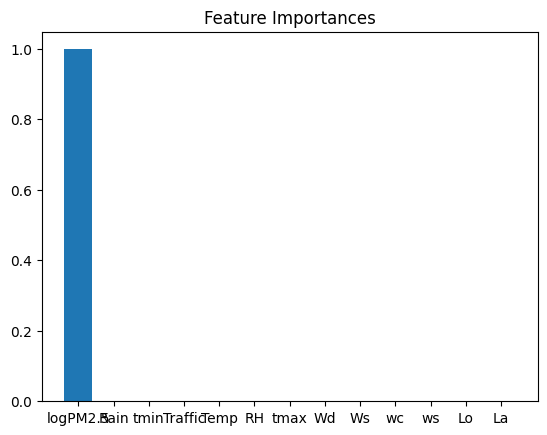

In [ ]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
plt.bar(features, importances)
plt.title("Feature Importances")
plt.show()